In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import trange, tqdm

from load_graph import *

In [2]:
def get_top_k_iefs(g, k):
    n_comms = max([max(c, default=0) for c in g.vs["comms"]]) + 1
    data = []
    for i in trange(g.vcount()):
        iefs = np.zeros(n_comms, dtype="float64")
        for n in g.vs[i].neighbors():
            for c in n["comms"]:
                iefs[c] += 1
        iefs = iefs / g.degree(i)
        iefs = np.sort(iefs)[::-1] # sorted in decreasing
        for j in range(k):
            row = (i, len(g.vs[i]["comms"]), j+1, iefs[j]) # row is (node_id, n_comms, rank, value)
            data.append(row)
    return pd.DataFrame(data, columns=["Node id", "N Comms", "IEF Rank", "IEF"])

# DBLP

100%|██████████| 317080/317080 [00:47<00:00, 6710.68it/s]


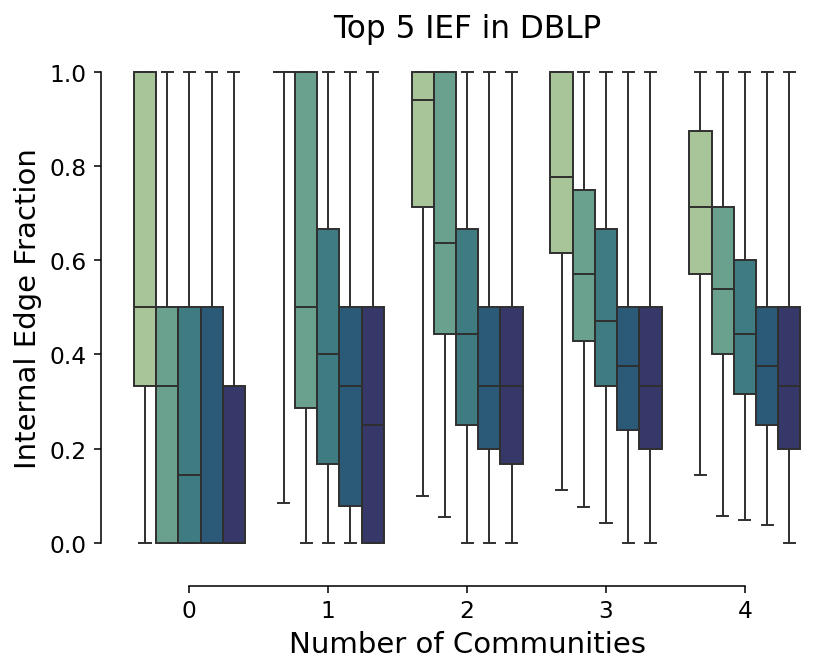

In [3]:
k = 5
name = "DBLP"
g, _ = load_snap("data/com-dblp.ungraph.txt", "data/com-dblp.all.cmty.txt")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 317080/317080 [00:29<00:00, 10583.03it/s]


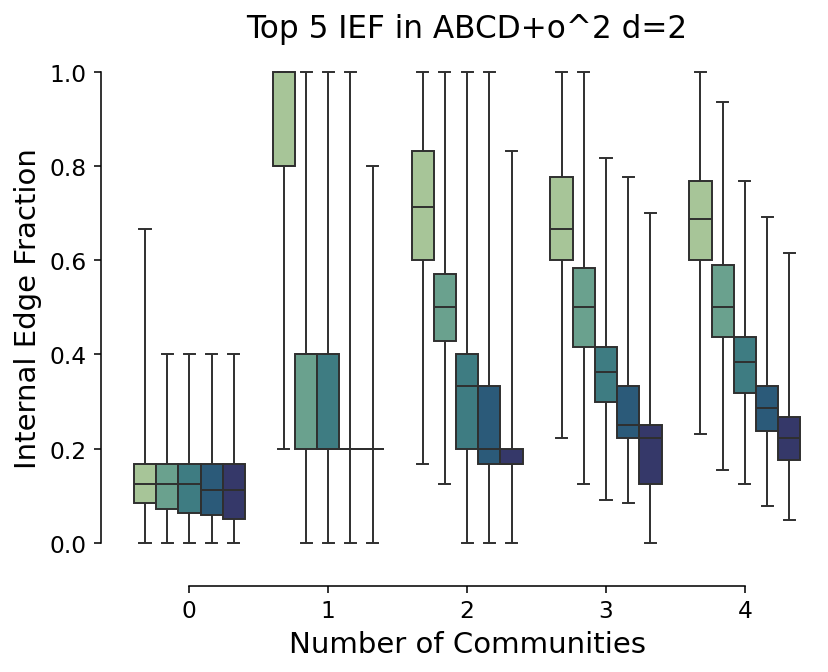

In [4]:
k = 5
name = "ABCD+o^2 d=2"
g, _ = load_abcdoo("data/abcdoo_dblp_d2_edge.dat", "data/abcdoo_dblp_d2_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 317080/317080 [00:33<00:00, 9507.07it/s] 


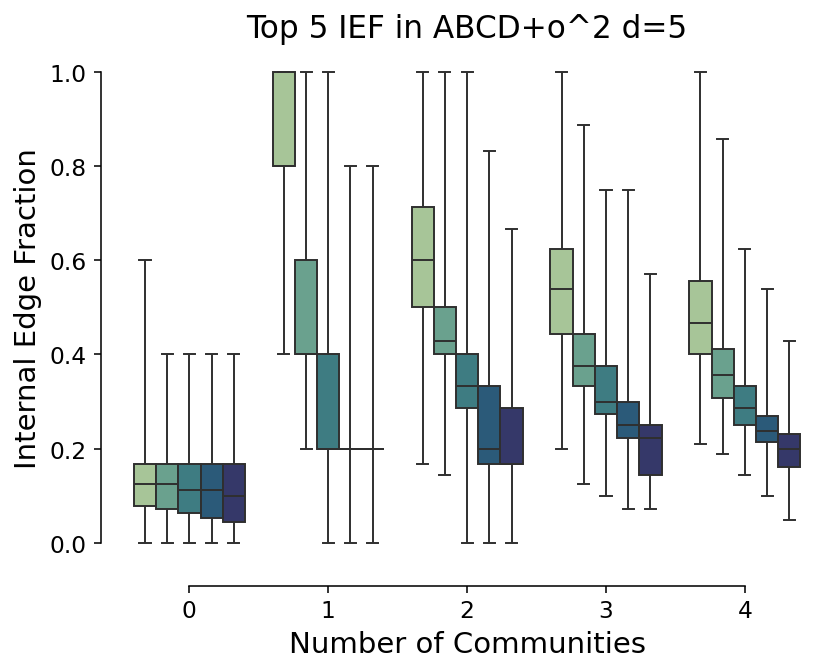

In [5]:
k = 5
name = "ABCD+o^2 d=5"
g, _ = load_abcdoo("data/abcdoo_dblp_d5_edge.dat", "data/abcdoo_dblp_d5_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 317080/317080 [00:32<00:00, 9674.31it/s] 


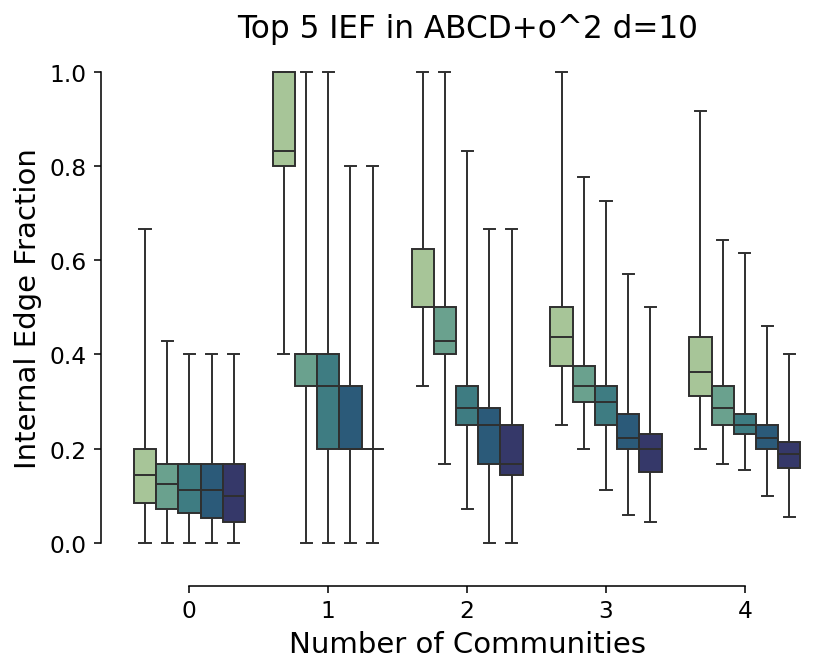

In [6]:
k = 5
name = "ABCD+o^2 d=10"
g, _ = load_abcdoo("data/abcdoo_dblp_d10_edge.dat", "data/abcdoo_dblp_d10_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

# Amazon

100%|██████████| 334863/334863 [05:13<00:00, 1067.69it/s]


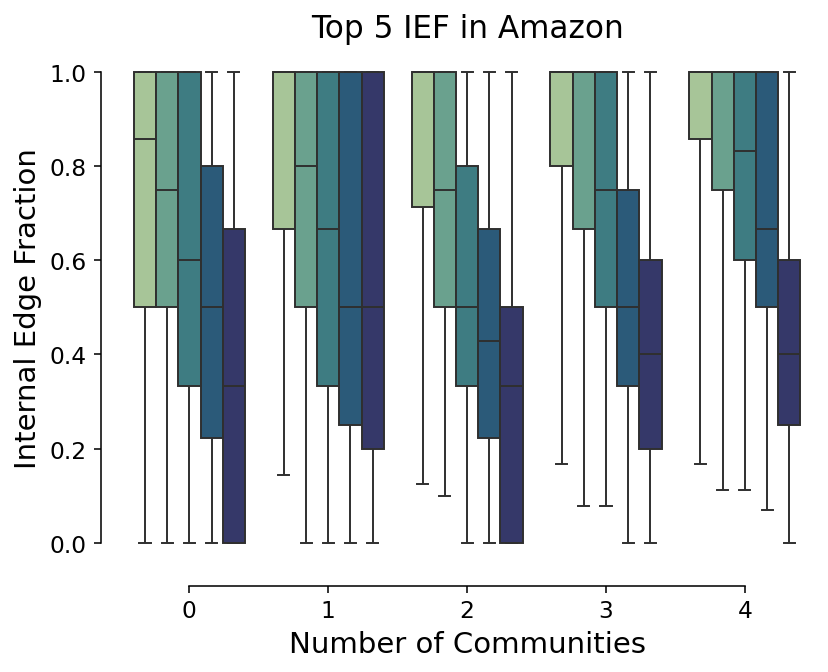

In [7]:
k = 5
name = "Amazon"
g, _ = load_snap("data/com-amazon.ungraph.txt", "data/com-amazon.all.dedup.cmty.txt")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 334863/334863 [01:37<00:00, 3444.07it/s]


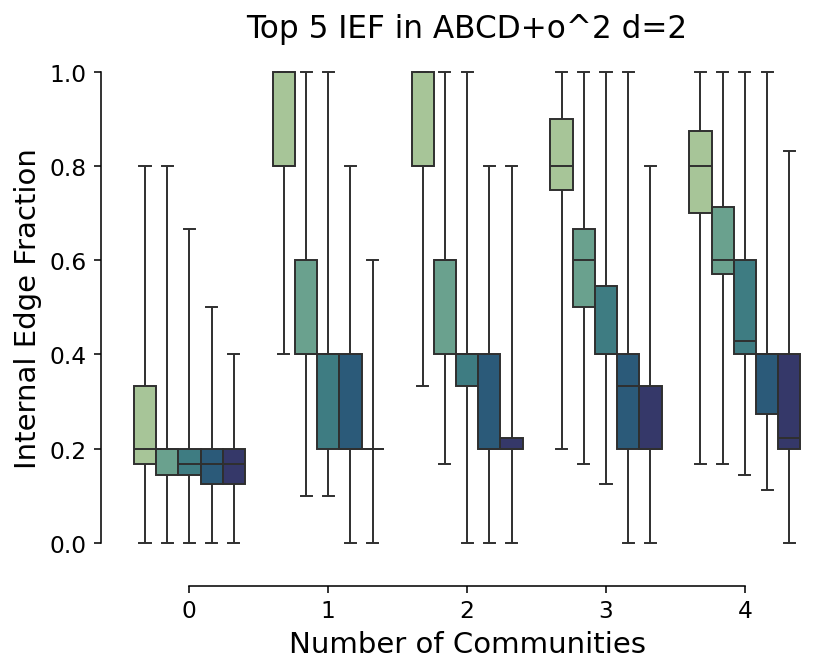

In [8]:
k = 5
name = "ABCD+o^2 d=2"
g, _ = load_abcdoo("data/abcdoo_amazon_d2_edge.dat", "data/abcdoo_amazon_d2_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 334863/334863 [01:39<00:00, 3375.88it/s]


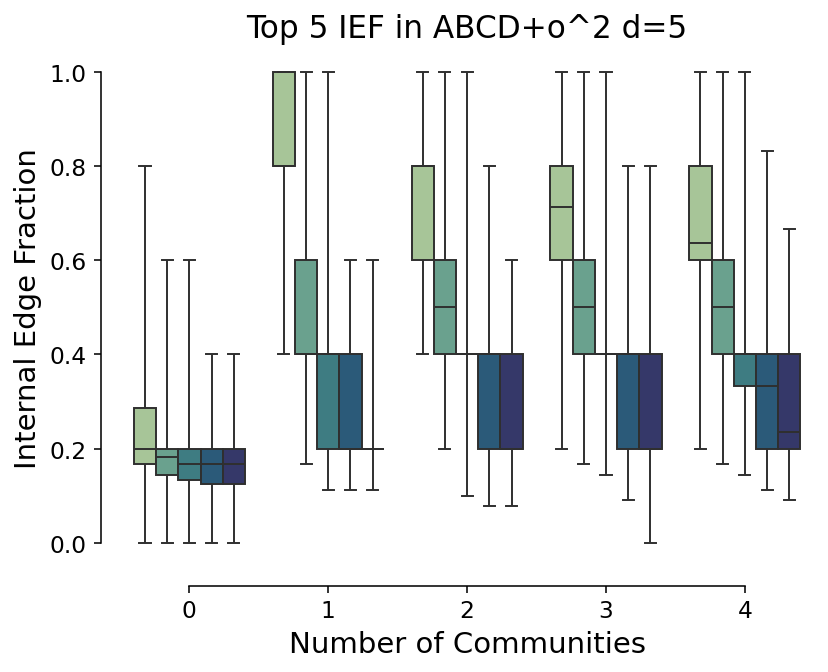

In [9]:
k = 5
name = "ABCD+o^2 d=5"
g, _ = load_abcdoo("data/abcdoo_amazon_d5_edge.dat", "data/abcdoo_amazon_d5_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 334863/334863 [01:39<00:00, 3369.44it/s]


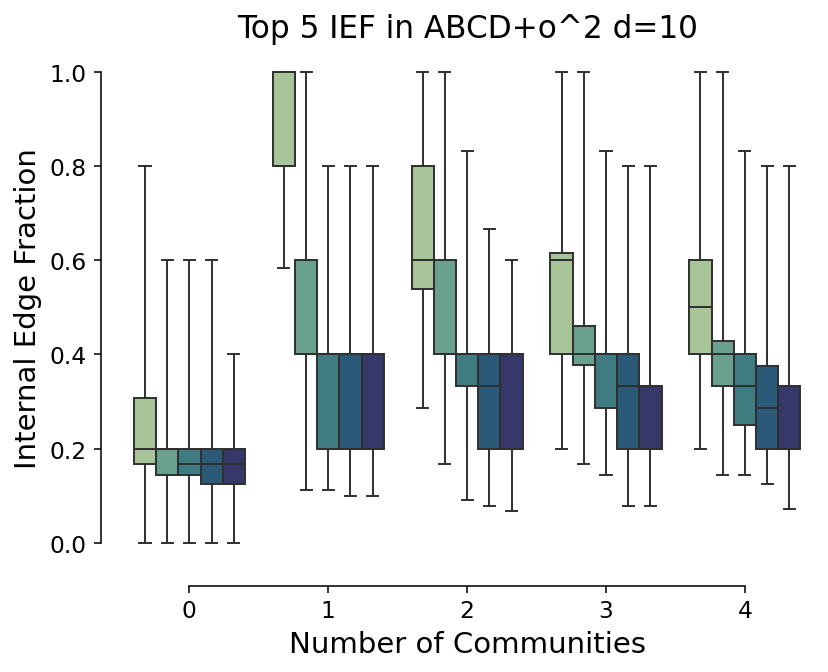

In [10]:
k = 5
name = "ABCD+o^2 d=10"
g, _ = load_abcdoo("data/abcdoo_amazon_d10_edge.dat", "data/abcdoo_amazon_d10_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

# Youtube

100%|██████████| 52675/52675 [00:09<00:00, 5519.64it/s]


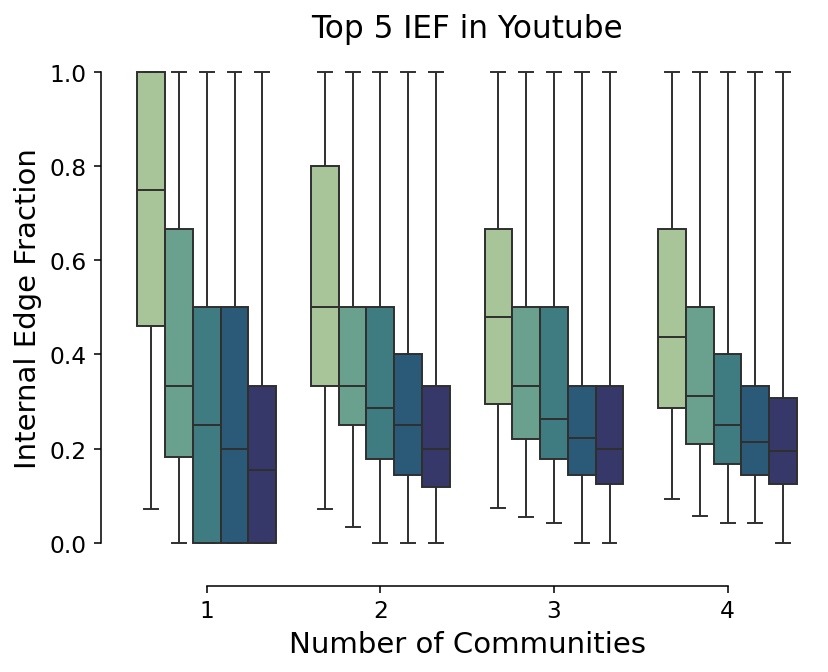

In [11]:
k = 5
name = "Youtube"
g, _ = load_snap("data/com-youtube.ungraph.txt", "data/com-youtube.all.cmty.txt", drop_outliers=True)
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)


100%|██████████| 52675/52675 [00:03<00:00, 16834.68it/s]


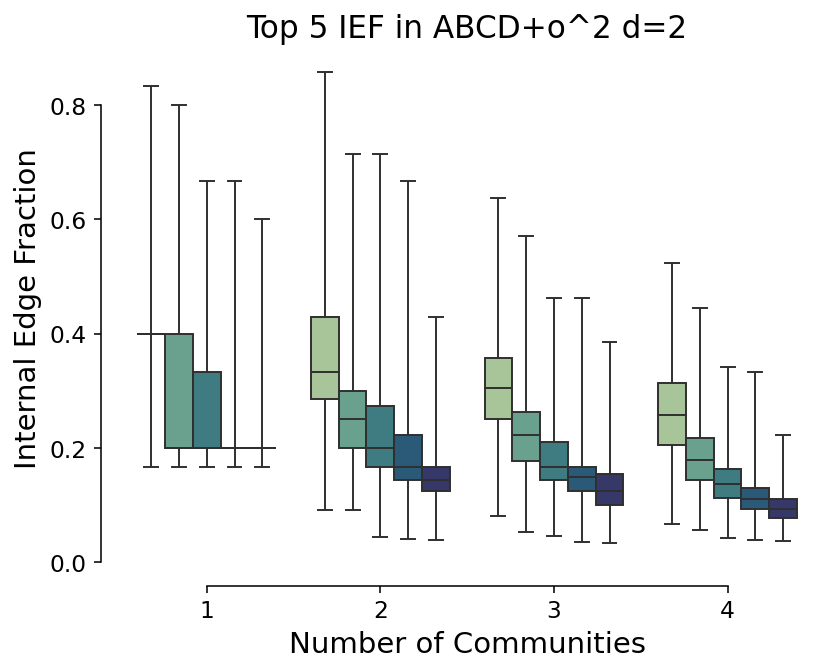

In [12]:
k = 5
name = "ABCD+o^2 d=2"
g, _ = load_abcdoo("data/abcdoo_youtube_d2_edge.dat", "data/abcdoo_youtube_d2_com.dat", has_outliers=False)
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 52675/52675 [00:03<00:00, 16663.84it/s]


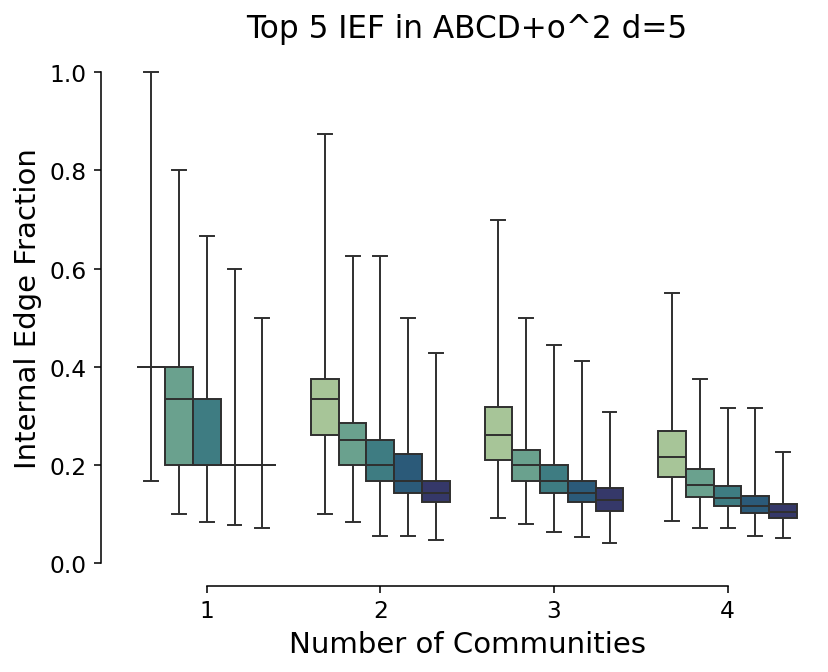

In [13]:
k = 5
name = "ABCD+o^2 d=5"
g, _ = load_abcdoo("data/abcdoo_youtube_d5_edge.dat", "data/abcdoo_youtube_d5_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)

100%|██████████| 52675/52675 [00:03<00:00, 14982.09it/s]


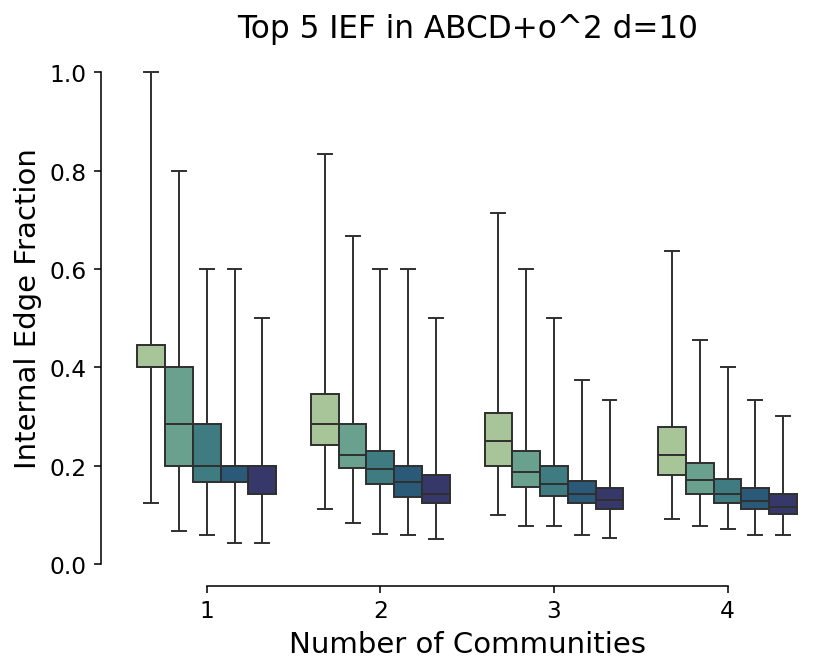

In [14]:
k = 5
name = "ABCD+o^2 d=10"
g, _ = load_abcdoo("data/abcdoo_youtube_d10_edge.dat", "data/abcdoo_youtube_d10_com.dat")
iefs = get_top_k_iefs(g, k)

sns.boxplot(x="N Comms", y="IEF",
            hue="IEF Rank", palette="crest",
            data=iefs[iefs["N Comms"] < k],
            whis=(0, 100),
            legend=False
            )
sns.despine(offset=10, trim=True)
plt.title(f"Top {k} IEF in {name}", fontsize=16)
plt.xlabel("Number of Communities", fontsize=15)
plt.ylabel("Internal Edge Fraction", fontsize=15)
plt.tick_params(labelsize=12)
fig = plt.gcf()
fig.set_dpi(140)